In [ ]:
# import os
# import re
# import numpy as np
# import pandas as pd
# import h5py
# from matplotlib import pyplot as plt
# from skimage.transform import resize  # Import resize from skimage

# def load_data(file_path):
#     """Load chlorophyll-a data from an HDF5 file using h5py."""
#     with h5py.File(file_path, 'r') as f:
#         chlor_a = f['chlor_a'][:]  # Assuming the chlorophyll-a data is stored under 'chlor_a'
#     return chlor_a

# def extract_date_from_filename(filename):
#     """Extract the date from the filename using regex."""
#     match = re.search(r'(\d{8})', filename)  # Find 8 consecutive digits (YYYYMMDD format)
#     if match:
#         date_str = match.group(1)
#         return pd.to_datetime(date_str, format='%Y%m%d')
#     else:
#         raise ValueError(f"Date not found in filename: {filename}")

# def lat_lon_to_pixel(lat, lon):
#     """Convert latitude and longitude to pixel coordinates in a 4320x8640 MODIS grid."""
#     y_pixel = int((90 - lat) / 180 * 4320)
#     x_pixel = int((lon + 180) / 360 * 8640)
#     return y_pixel, x_pixel

# def save_resized_patch(data, region_name, x_min, x_max, y_min, y_max, output_path, target_size=512):
#     """Save a 32x32 patch as a resized 512x512 .png file."""
#     patch = data[y_min:y_max, x_min:x_max]

#     # Resize the 32x32 patch to 512x512
#     resized_patch = resize(patch, (target_size, target_size), anti_aliasing=True)

#     # Save with color bar and title
#     plt.imshow(resized_patch, cmap='jet', vmin=0, vmax=20)
#     plt.colorbar(label='Chlorophyll-a (mg m^-3)')
#     plt.title(f'Chlorophyll-a Concentration ({region_name}) - Resized {target_size}x{target_size}')
#     plt.savefig(output_path, bbox_inches='tight', dpi=300)
#     plt.close()

# def save_resized_patch_no_colorbar(data, x_min, x_max, y_min, y_max, output_path, target_size=512):
#     """Save a 32x32 patch as a resized 512x512 .png file without color bar or title."""
#     patch = data[y_min:y_max, x_min:x_max]

#     # Resize the 32x32 patch to 512x512
#     resized_patch = resize(patch, (target_size, target_size), anti_aliasing=True)

#     # Save without color bar or title
#     plt.imshow(resized_patch, cmap='jet', vmin=0, vmax=20)
#     plt.axis('off')  # Remove axis for cleaner output
#     plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=300)
#     plt.close()

# def process_file(file_path, output_directory):
#     # Extract date from the filename
#     filename = os.path.basename(file_path)
#     idate = extract_date_from_filename(filename)

#     # Output directory 설정
#     odir = os.path.join(output_directory, f"{idate.year}/{idate.month:02d}")
#     os.makedirs(odir, exist_ok=True)

#     # 데이터 로드
#     chlor_a = load_data(file_path)

#     # 낙동강 (Nakdong River) 영역
#     nakdong_lat_min, nakdong_lat_max = 33.8, 34.9
#     nakdong_lon_min, nakdong_lon_max = 128.5, 129.5
#     nakdong_y_min, nakdong_x_min = lat_lon_to_pixel(nakdong_lat_max, nakdong_lon_min)
#     nakdong_y_max, nakdong_x_max = lat_lon_to_pixel(nakdong_lat_min, nakdong_lon_max)

#     # 새만금 (Saemangeum) 영역
#     saemangeum_lat_min, saemangeum_lat_max = 35.7, 36.3
#     saemangeum_lon_min, saemangeum_lon_max = 125.7, 126.4
#     saemangeum_y_min, saemangeum_x_min = lat_lon_to_pixel(saemangeum_lat_max, saemangeum_lon_min)
#     saemangeum_y_max, saemangeum_x_max = lat_lon_to_pixel(saemangeum_lat_min, saemangeum_lon_max)

#     # 32x32 패치 추출 및 512x512로 리사이즈하여 저장
#     patch_size = 32

#     # Center of Nakdong region
#     nakdong_center_y = (nakdong_y_min + nakdong_y_max) // 2
#     nakdong_center_x = (nakdong_x_min + nakdong_x_max) // 2
#     nakdong_patch_region = {
#         'y_min': nakdong_center_y - patch_size // 2,
#         'y_max': nakdong_center_y + patch_size // 2,
#         'x_min': nakdong_center_x - patch_size // 2,
#         'x_max': nakdong_center_x + patch_size // 2
#     }

#     # Center of Saemangeum region
#     saemangeum_center_y = (saemangeum_y_min + saemangeum_y_max) // 2
#     saemangeum_center_x = (saemangeum_x_min + saemangeum_x_max) // 2
#     saemangeum_patch_region = {
#         'y_min': saemangeum_center_y - patch_size // 2,
#         'y_max': saemangeum_center_y + patch_size // 2,
#         'x_min': saemangeum_center_x - patch_size // 2,
#         'x_max': saemangeum_center_x + patch_size // 2
#     }

#     # 낙동강 영역 패치 저장 (512x512 리사이즈, with colorbar)
#     nakdong_output_path = f'{odir}/{idate.strftime("%Y%m%d")}_nak_bar.png'
#     save_resized_patch(chlor_a, 'Nakdong River', **nakdong_patch_region, output_path=nakdong_output_path, target_size=512)

#     # 새만금 영역 패치 저장 (512x512 리사이즈, with colorbar)
#     saemangeum_output_path = f'{odir}/{idate.strftime("%Y%m%d")}_sae_bar.png'
#     save_resized_patch(chlor_a, 'Saemangeum', **saemangeum_patch_region, output_path=saemangeum_output_path, target_size=512)

#     # 낙동강 영역 패치 저장 (512x512 리사이즈, without colorbar)
#     nakdong_output_path_no_bar = f'{odir}/{idate.strftime("%Y%m%d")}_nak.png'
#     save_resized_patch_no_colorbar(chlor_a, **nakdong_patch_region, output_path=nakdong_output_path_no_bar, target_size=512)

#     # 새만금 영역 패치 저장 (512x512 리사이즈, without colorbar)
#     saemangeum_output_path_no_bar = f'{odir}/{idate.strftime("%Y%m%d")}_sae.png'
#     save_resized_patch_no_colorbar(chlor_a, **saemangeum_patch_region, output_path=saemangeum_output_path_no_bar, target_size=512)

# def main(directory_path, output_directory):
#     # List all files in the directory
#     files = [f for f in os.listdir(directory_path) if f.endswith('.nc')]  # Only process .nc files

#     # Process each file
#     for file in files:
#         file_path = os.path.join(directory_path, file)
#         try:
#             process_file(file_path, output_directory)
#             print(f"Processed: {file}")
#         except Exception as e:
#             print(f"Failed to process {file}: {e}")

# if __name__ == "__main__":
#     directory_path = '/media/juneyonglee/My Book/MODIS/MODIS_aqua_8days'
#     output_directory = '/media/juneyonglee/My Book/Preprocessed/MODIS'  # Specify the output directory
#     main(directory_path, output_directory)


In [ ]:
# import os
# import re
# import numpy as np
# import pandas as pd
# import h5py
# from matplotlib import pyplot as plt
# from skimage.transform import resize  # Import resize from skimage

# def load_data(file_path):
#     """Load chlorophyll-a data from an HDF5 file using h5py."""
#     with h5py.File(file_path, 'r') as f:
#         chlor_a = f['chlor_a'][:]  # Assuming the chlorophyll-a data is stored under 'chlor_a'
#     return chlor_a

# def extract_date_from_filename(filename):
#     """Extract the date from the filename using regex."""
#     match = re.search(r'(\d{8})', filename)  # Find 8 consecutive digits (YYYYMMDD format)
#     if match:
#         date_str = match.group(1)
#         return pd.to_datetime(date_str, format='%Y%m%d')
#     else:
#         raise ValueError(f"Date not found in filename: {filename}")

# def lat_lon_to_pixel(lat, lon):
#     """Convert latitude and longitude to pixel coordinates in a 4320x8640 MODIS grid."""
#     y_pixel = int((90 - lat) / 180 * 4320)
#     x_pixel = int((lon + 180) / 360 * 8640)
#     return y_pixel, x_pixel

# def save_original_patch(data, region_name, x_min, x_max, y_min, y_max, output_path):
#     """Save a 32x32 patch as is, without resizing."""
#     patch = data[y_min:y_max, x_min:x_max]

#     # Save with color bar and title
#     plt.imshow(patch, cmap='jet', vmin=0, vmax=20)
#     plt.colorbar(label='Chlorophyll-a (mg m^-3)')
#     plt.title(f'Chlorophyll-a Concentration ({region_name}) - Original 32x32')
#     plt.savefig(output_path, bbox_inches='tight', dpi=300)
#     plt.close()

# def save_original_patch_no_colorbar(data, x_min, x_max, y_min, y_max, output_path):
#     """Save a 32x32 patch as is, without color bar or title."""
#     patch = data[y_min:y_max, x_min:x_max]

#     # Save without color bar or title
#     plt.imshow(patch, cmap='jet', vmin=0, vmax=20)
#     plt.axis('off')  # Remove axis for cleaner output
#     plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=300)
#     plt.close()

# def process_file(file_path, output_directory):
#     # Extract date from the filename
#     filename = os.path.basename(file_path)
#     idate = extract_date_from_filename(filename)

#     # Output directory 설정
#     odir = os.path.join(output_directory, f"{idate.year}/{idate.month:02d}")
#     os.makedirs(odir, exist_ok=True)

#     # 데이터 로드
#     chlor_a = load_data(file_path)

#     # 낙동강 (Nakdong River) 영역
#     nakdong_lat_min, nakdong_lat_max = 33.8, 34.9
#     nakdong_lon_min, nakdong_lon_max = 128.5, 129.5
#     nakdong_y_min, nakdong_x_min = lat_lon_to_pixel(nakdong_lat_max, nakdong_lon_min)
#     nakdong_y_max, nakdong_x_max = lat_lon_to_pixel(nakdong_lat_min, nakdong_lon_max)

#     # 새만금 (Saemangeum) 영역
#     saemangeum_lat_min, saemangeum_lat_max = 35.7, 36.3
#     saemangeum_lon_min, saemangeum_lon_max = 125.7, 126.4
#     saemangeum_y_min, saemangeum_x_min = lat_lon_to_pixel(saemangeum_lat_max, saemangeum_lon_min)
#     saemangeum_y_max, saemangeum_x_max = lat_lon_to_pixel(saemangeum_lat_min, saemangeum_lon_max)

#     # 32x32 패치 추출
#     patch_size = 32

#     # Center of Nakdong region
#     nakdong_center_y = (nakdong_y_min + nakdong_y_max) // 2
#     nakdong_center_x = (nakdong_x_min + nakdong_x_max) // 2
#     nakdong_patch_region = {
#         'y_min': nakdong_center_y - patch_size // 2,
#         'y_max': nakdong_center_y + patch_size // 2,
#         'x_min': nakdong_center_x - patch_size // 2,
#         'x_max': nakdong_center_x + patch_size // 2
#     }

#     # Center of Saemangeum region
#     saemangeum_center_y = (saemangeum_y_min + saemangeum_y_max) // 2
#     saemangeum_center_x = (saemangeum_x_min + saemangeum_x_max) // 2
#     saemangeum_patch_region = {
#         'y_min': saemangeum_center_y - patch_size // 2,
#         'y_max': saemangeum_center_y + patch_size // 2,
#         'x_min': saemangeum_center_x - patch_size // 2,
#         'x_max': saemangeum_center_x + patch_size // 2
#     }

#     # 낙동강 영역 패치 저장 (original 32x32, with colorbar)
#     nakdong_output_path = f'{odir}/{idate.strftime("%Y%m%d")}_nak_bar.png'
#     save_original_patch(chlor_a, 'Nakdong River', **nakdong_patch_region, output_path=nakdong_output_path)

#     # 새만금 영역 패치 저장 (original 32x32, with colorbar)
#     saemangeum_output_path = f'{odir}/{idate.strftime("%Y%m%d")}_sae_bar.png'
#     save_original_patch(chlor_a, 'Saemangeum', **saemangeum_patch_region, output_path=saemangeum_output_path)

#     # 낙동강 영역 패치 저장 (original 32x32, without colorbar)
#     nakdong_output_path_no_bar = f'{odir}/{idate.strftime("%Y%m%d")}_nak.png'
#     save_original_patch_no_colorbar(chlor_a, **nakdong_patch_region, output_path=nakdong_output_path_no_bar)

#     # 새만금 영역 패치 저장 (original 32x32, without colorbar)
#     saemangeum_output_path_no_bar = f'{odir}/{idate.strftime("%Y%m%d")}_sae.png'
#     save_original_patch_no_colorbar(chlor_a, **saemangeum_patch_region, output_path=saemangeum_output_path_no_bar)

# def main(directory_path, output_directory):
#     # List all files in the directory
#     files = [f for f in os.listdir(directory_path) if f.endswith('.nc')]  # Only process .nc files

#     # Process each file
#     for file in files:
#         file_path = os.path.join(directory_path, file)
#         try:
#             process_file(file_path, output_directory)
#             print(f"Processed: {file}")
#         except Exception as e:
#             print(f"Failed to process {file}: {e}")

# if __name__ == "__main__":
#     directory_path = '/media/juneyonglee/My Book/MODIS/MODIS_aqua_8days'
#     output_directory = '/media/juneyonglee/My Book/Preprocessed/MODIS_32patch_noresize'  # Specify the output directory
#     main(directory_path, output_directory)


Processed: AQUA_MODIS.20170415_20170422.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20181024_20181031.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20130517_20130524.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20200625_20200702.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20200321_20200328.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20200703_20200710.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20240609_20240616.L3m.8D.CHL.chlor_a.4km.NRT.nc
Processed: AQUA_MODIS.20160406_20160413.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20141117_20141124.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20201116_20201123.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20140914_20140921.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20240101_20240108.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20210720_20210727.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20141101_20141108.L3m.8D.CHL.chlor_a.4km.nc
Processed: AQUA_MODIS.20140415_20140422.L3m.8D.CHL.chlor_a.4km.nc
Proces

In [ ]:
# import os
# from PIL import Image
# import matplotlib.pyplot as plt

# # Define the root directory where PNG files are stored
# root_directory = "/home/juneyonglee/Desktop/AY_ust/Notebook/output/fig"

# # List all PNG files from all subdirectories
# png_files = []
# for dirpath, _, filenames in os.walk(root_directory):
#     for filename in filenames:
#         if filename.endswith('.png'):
#             png_files.append(os.path.join(dirpath, filename))

# # Print all PNG file paths
# for png_file in png_files:
#     print(png_file)

# # Function to display images
# def display_images(png_files):
#     for png_file in png_files:
#         img = Image.open(png_file)
#         plt.figure()
#         plt.imshow(img)
#         plt.title(os.path.basename(png_file))
#         plt.axis('off')  # Hide axes for better viewing
#         plt.show()

# # Display the images
# display_images(png_files)


### ust21 8day vs modis 8day difference map

In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

# Paths to directories
ust21_directory_path = '/home/juneyonglee/MyData/backup_20240914/AY_UST/performance/ust21_chl_color/ust21_chl_color_loss_recon/ust21_chl_8day_0/600000/color_10'
modis_root_directory = '/media/juneyonglee/My Book/Preprocessed/MODIS_32patch_noresize'
save_directory = '/home/juneyonglee/MyData/backup_20240914/AY_UST/ust21_modis_difference_map_loss_recon'
land_sea_mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.npy'  # Path to land-sea mask

# Load the land-sea mask once
land_sea_mask = np.load(land_sea_mask_path)

# Initialize a list to store all difference maps for mean bias calculation
all_difference_maps = []

# Function to extract row, column, and date from the file name
def extract_info_from_filename(filename):
    match = re.search(r'(\d{8})_.*_r(\d+)_c(\d+)', filename)
    if match:
        date = match.group(1)
        actual_row = int(match.group(2))
        actual_col = int(match.group(3))
        return date, actual_row, actual_col
    else:
        raise ValueError(f"Date or coordinates not found in filename: {filename}")

def preprocess_image(image_path):
    # Load the image as grayscale and handle it as raw chlorophyll-a data
    image = imread(image_path)
    if image.shape[-1] == 4:  # If there's an alpha channel
        image = image[..., :3]  # Remove alpha channel
    grayscale_image = rgb2gray(image)  # Convert to grayscale (normalizes to [0, 1])

    # Scale back to the range [0, 20]
    grayscale_image = grayscale_image * 20

    # Set fill values and outliers to NaN
    grayscale_image = np.where(grayscale_image == -999, np.nan, grayscale_image)  # Handle fill values
    grayscale_image[grayscale_image > 20] = np.nan  # Set values >20 to NaN

    return grayscale_image

# Function to find MODIS file matching the date in the directory structure
def find_modis_file(modis_root, date, region):
    year = date[:4]
    month = date[4:6]
    modis_dir = os.path.join(modis_root, year, month)
    if os.path.exists(modis_dir):
        for file in os.listdir(modis_dir):
            if region in file and date in file and '_bar' not in file:
                return os.path.join(modis_dir, file)
    return None

# Function to map UST21 coordinates to MODIS coordinates
def map_ust21_to_modis(actual_row, actual_col, region):
    x_nak, y_nak = (3751, 4757)
    x_sae, y_sae = (3505, 3920)
    if region == 'nak':
        modis_row = actual_row - x_nak
        modis_col = actual_col - y_nak + 256
    elif region == 'sae':
        modis_row = actual_row - x_sae + 256
        modis_col = actual_col - y_sae + 512
    else:
        raise ValueError(f"Invalid region specified: {region}. Must be 'nak' or 'sae'.")
    return modis_row, modis_col

# Function to extract the correct MODIS 256x256 patch based on UST21 coordinates
def find_modis_patch_from_ust21(actual_row, actual_col, modis_patch, region):
    modis_row, modis_col = map_ust21_to_modis(actual_row, actual_col, region)
    max_row, max_col = modis_patch.shape[0] - 256, modis_patch.shape[1] - 256
    modis_row = min(max(modis_row, 0), max_row)
    modis_col = min(max(modis_col, 0), max_col)

    # Extract the 256x256 patch and handle 0 values as NaN
    modis_patch_256 = modis_patch[modis_row:modis_row + 256, modis_col:modis_col + 256].astype(float)
    return modis_patch_256

def preprocess_image(image_path):
    # Load the image as grayscale and handle it as raw chlorophyll-a data
    image = imread(image_path)
    if image.shape[-1] == 4:  # If there's an alpha channel
        image = image[..., :3]  # Remove alpha channel
    grayscale_image = rgb2gray(image)  # Convert to grayscale (normalizes to [0, 1])

    # Scale back to the range [0, 20]
    grayscale_image = grayscale_image * 20

    # Set fill values and outliers to NaN
    grayscale_image = np.where(grayscale_image == -999, np.nan, grayscale_image)  # Handle fill values
    grayscale_image[grayscale_image > 20] = np.nan  # Set values >20 to NaN

    return grayscale_image

# Function to compute RMSE for a list of difference maps
def compute_rmse(difference_maps):
    rmse = np.sqrt(np.mean(np.square(difference_maps)))
    return rmse

# Function to compute difference map
def compute_difference_map(ust21_patch, modis_patch):
    if ust21_patch.shape != modis_patch.shape:
        raise ValueError("UST21 patch and MODIS patch must have the same shape.")
    return ust21_patch - modis_patch

def visualize_difference_map(diff_map, region_name, row, col, land_sea_mask, save_path):
    # # Normalize the difference map to the range -20 to 20 for visualization
    # diff_min, diff_max = np.nanmin(diff_map), np.nanmax(diff_map)
    # if diff_max != diff_min:
    #     diff_map_normalized = ((diff_map - diff_min) / (diff_max - diff_min) * 40) - 20
    # else:
    #     diff_map_normalized = np.zeros_like(diff_map)  # Set to zero if no variation
    # Clip the data to the desired range for display
    diff_map_clipped = np.clip(diff_map, -20, 20)

    # Normalize for `imshow` to avoid clipping warnings
    norm_diff_map = (diff_map_clipped + 20) / 40  # Scale to [0, 1] range
    # Downsample the land-sea mask to 32x32 and apply threshold based on the mean
    land_mask_cropped = land_sea_mask[row:row + 256, col:col + 256]
    land_mask_32 = resize(land_mask_cropped, (32, 32), anti_aliasing=True)

    # Binarize the mask based on the mean value
    threshold = np.mean(land_mask_32)
    land_mask_32 = (land_mask_32 < threshold).astype(int)

    # Apply the land mask to the normalized difference map
    norm_diff_map[land_mask_32 == 1] = np.nan  # Set land areas to NaN

    # Plot the difference map with land areas masked as white
    plt.figure(figsize=(6, 6))
    plt.imshow(norm_diff_map, cmap='RdBu_r', vmin=0, vmax=1)
    plt.colorbar(label='Chlorophyll-a Difference (mg m^-3)')
    plt.title(f'Difference Map: {region_name}')
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()

# Initialize separate lists to store difference maps for each region
nakdong_difference_maps = []
saemangeum_difference_maps = []

# Updated function to calculate mean bias map for a specific region
def calculate_mean_bias_map(region_difference_maps):
    # Stack all difference maps and calculate the mean ignoring NaNs
    stacked_diff_maps = np.stack(region_difference_maps)
    mean_bias_map = np.nanmean(stacked_diff_maps, axis=0)
    return mean_bias_map

# Updated function to visualize the mean bias map for a specific region
def visualize_mean_bias_map(mean_bias_map, region_name, save_path):
    # Check if there are any valid values to determine a dynamic range
    valid_values = mean_bias_map[~np.isnan(mean_bias_map)]
    if valid_values.size == 0:
        print(f"Warning: Mean bias map for {region_name} has no valid values.")
        return

    # Determine the min and max for dynamic range adjustment
    min_val, max_val = np.nanmin(valid_values), np.nanmax(valid_values)
    print(f"Dynamic range for mean bias map ({region_name}) visualization: min={min_val}, max={max_val}")

    # Plot the mean bias map with dynamic vmin and vmax
    plt.figure(figsize=(6, 6))
    plt.imshow(mean_bias_map, cmap='RdBu_r', vmin=min_val, vmax=max_val)
    plt.colorbar(label='Mean Bias (mg m^-3)')
    plt.title(f'Mean Bias Map: {region_name}')
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()
# Function to compute and visualize RMSE scatter plot with all RMSE points and overall average
def visualize_rmse_scatter_by_year(rmse_by_year, region_name, save_path):
    years = []
    rmse_values = []

    for year, rmse_list in rmse_by_year.items():
        years.extend([year] * len(rmse_list))  # Add the year for each RMSE point
        rmse_values.extend(rmse_list)  # Add all RMSE values for that year

    # Compute the overall average RMSE
    overall_average_rmse = np.mean(rmse_values)

    # Create a scatter plot with all RMSE points
    plt.figure(figsize=(8, 6))
    plt.scatter(years, rmse_values, color='blue', s=100, edgecolor='black')

    # # Annotate each point with RMSE values
    # for i, (year, rmse_value) in enumerate(zip(years, rmse_values)):
    #     plt.text(years[i], rmse_values[i], f'{rmse_value:.2f}', fontsize=8, ha='center', va='bottom')

    plt.xlabel('Year')
    plt.ylabel('RMSE (mg m^-3)')
    plt.title(f'RMSE Over Years: {region_name}')
    plt.grid(True)

    # Display the overall average RMSE in the bottom-right corner of the graph
    plt.text(0.8, 0.05, f'Overall Average RMSE: {overall_average_rmse:.2f}', fontsize=12, ha='right', va='bottom', transform=plt.gca().transAxes)

    # Save the scatter plot
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()

# Function to save UST21 patch, MODIS patch, and difference map side by side
def save_patches_and_diffmap(ust21_patch, modis_patch, diff_map, region_name, date, row, col,land_sea_mask, save_dir):
    # Create the save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    # Path for saving the combined visualization
    save_path = os.path.join(
        save_dir, f"combined_patches_diffmap_{region_name}_{date}_r{row}_c{col}.png"
    )
    #     # Normalize the difference map to the range -20 to 20 for visualization
    # diff_min, diff_max = np.nanmin(diff_map), np.nanmax(diff_map)
    # if diff_max != diff_min:
    #     diff_map_normalized = ((diff_map - diff_min) / (diff_max - diff_min) * 40) - 20
    # else:
    #     diff_map_normalized = np.zeros_like(diff_map)  # Set to zero if no variation
        # Apply UST21 mask: ocean=1, land=999

    land_mask_cropped = land_sea_mask[row:row + 256, col:col + 256]
    land_mask_32 = resize(land_mask_cropped, (32, 32), anti_aliasing=True)

    # Binarize the mask based on the mean value
    threshold = np.mean(land_mask_32)
    land_mask_32 = (land_mask_32 < threshold).astype(int)

    if not np.array_equal(np.unique(land_mask_32), [1]):  # Apply mask only if it contains land values
        ust21_patch[land_mask_32 == 1] = np.nan
    # Apply the land mask to the normalized difference map
        # Clip the data to the desired range for display
    diff_map_clipped = np.clip(diff_map, -20, 20)

    # Normalize for `imshow` to avoid clipping warnings
    norm_diff_map = (diff_map_clipped + 20) / 40  # Scale to [0, 1] range
    norm_diff_map[land_mask_32 == 1] = np.nan  # Set land areas to NaN
    # Create a figure with 1 row and 3 columns
    plt.figure(figsize=(15, 5))

    # Plot UST21 patch
    plt.subplot(1, 3, 1)
    # plt.imshow(ust21_patch, cmap="jet", vmin=np.nanmin(ust21_patch), vmax=np.nanmax(ust21_patch))
    plt.imshow(ust21_patch, cmap="jet")
    plt.colorbar(label="Chlorophyll-a (mg m^-3)")
    plt.title("UST21 Patch")

    # Plot MODIS patch
    plt.subplot(1, 3, 2)
    # plt.imshow(modis_patch, cmap="jet", vmin=np.nanmin(modis_patch), vmax=np.nanmax(modis_patch))
    plt.imshow(modis_patch, cmap="jet")
    plt.colorbar(label="Chlorophyll-a (mg m^-3)")
    plt.title("MODIS Patch")

    # Plot Difference map
    plt.subplot(1, 3, 3)
    plt.imshow(norm_diff_map, cmap="RdBu_r", vmin=-20, vmax=20)
    plt.colorbar(label="Difference (mg m^-3)")
    plt.title("Difference Map")

    # Save the figure
    plt.suptitle(f"Region: {region_name}, Date: {date}, Row: {row}, Col: {col}")
    plt.savefig(save_path, bbox_inches="tight", dpi=300)
    plt.close()


# Main processing function
def process_files(directory, modis_root, save_dir, land_sea_mask):
    os.makedirs(save_dir, exist_ok=True)
    rmse_by_year_nakdong = {}
    rmse_by_year_saemangeum = {}

    for file in os.listdir(directory):
        if file.endswith('.png') and '_bar' not in file:
            try:
                ust21_date, actual_row, actual_col = extract_info_from_filename(file)
                year = int(ust21_date[:4])

                # Process Nakdong region
                modis_nakdong = find_modis_file(modis_root, ust21_date, 'nak')
                if modis_nakdong and 'nak' in file:
                    region = 'nak'
                    modis_patch = preprocess_image(modis_nakdong)
                    ust21_patch = resize(preprocess_image(os.path.join(directory, file)), (32, 32))  # Downsample to 32x32

                    modis_patch_256 = find_modis_patch_from_ust21(actual_row, actual_col, modis_patch, region)
                    modis_patch_32 = resize(modis_patch_256, (32, 32))  # Downsample MODIS to 32x32 for comparison
                    diff_map = compute_difference_map(ust21_patch, modis_patch_32)

                    # Store the difference map for mean bias calculation
                    nakdong_difference_maps.append(diff_map)

                    # Calculate and store RMSE
                    patch_rmse = compute_rmse(diff_map)
                    rmse_by_year_nakdong.setdefault(year, []).append(patch_rmse)

                    save_path = os.path.join(save_dir, f'difference_map_nakdong_{ust21_date}_r{actual_row}_c{actual_col}.png')
                    visualize_difference_map(diff_map, region, actual_row, actual_col, land_sea_mask, save_path)

                     # Save patches and diff map
                    save_patches_and_diffmap(
                        ust21_patch, modis_patch_32, diff_map,
                        region_name=region,
                        date=ust21_date, row=actual_row, col=actual_col,
                        land_sea_mask=land_sea_mask,
                        save_dir=save_dir
                    )

                # Process Saemangeum region
                modis_saemangeum = find_modis_file(modis_root, ust21_date, 'sae')
                if modis_saemangeum and 'sae' in file:
                    region = 'sae'
                    modis_patch = preprocess_image(modis_saemangeum)
                    ust21_patch = resize(preprocess_image(os.path.join(directory, file)), (32, 32))  # Downsample to 32x32

                    modis_patch_256 = find_modis_patch_from_ust21(actual_row, actual_col, modis_patch, region)
                    modis_patch_32 = resize(modis_patch_256, (32, 32))  # Downsample MODIS to 32x32 for comparison
                    diff_map = compute_difference_map(ust21_patch, modis_patch_32)

                    # Save patches and diff map
                    save_patches_and_diffmap(
                        ust21_patch, modis_patch_32, diff_map,
                        region_name=region,
                        date=ust21_date, row=actual_row, col=actual_col,
                        land_sea_mask=land_sea_mask,
                        save_dir=save_dir
                    )

                    # Store the difference map for mean bias calculation
                    saemangeum_difference_maps.append(diff_map)

                    # Calculate and store RMSE
                    patch_rmse = compute_rmse(diff_map)
                    rmse_by_year_saemangeum.setdefault(year, []).append(patch_rmse)

                    save_path = os.path.join(save_dir, f'difference_map_saemangeum_{ust21_date}_r{actual_row}_c{actual_col}.png')
                    visualize_difference_map(diff_map, region, actual_row, actual_col, land_sea_mask, save_path)
            except Exception as e:
                print(f"Error processing file {file}: {e}")

    # Visualize RMSE scatter plot for Nakdong
    if rmse_by_year_nakdong:
        visualize_rmse_scatter_by_year(rmse_by_year_nakdong, 'Nakdong', os.path.join(save_dir, 'rmse_scatter_nakdong.png'))

    # Visualize RMSE scatter plot for Saemangeum
    if rmse_by_year_saemangeum:
        visualize_rmse_scatter_by_year(rmse_by_year_saemangeum, 'Saemangeum', os.path.join(save_dir, 'rmse_scatter_saemangeum.png'))

    # Calculate and save the mean bias map for Nakdong
    if nakdong_difference_maps:
        mean_bias_map_nakdong = calculate_mean_bias_map(nakdong_difference_maps)
        mean_bias_map_nakdong_path = os.path.join(save_dir, 'mean_bias_map_nakdong.png')
        visualize_mean_bias_map(mean_bias_map_nakdong, "Nakdong", mean_bias_map_nakdong_path)

    # Calculate and save the mean bias map for Saemangeum
    if saemangeum_difference_maps:
        mean_bias_map_saemangeum = calculate_mean_bias_map(saemangeum_difference_maps)
        mean_bias_map_saemangeum_path = os.path.join(save_dir, 'mean_bias_map_saemangeum.png')
        visualize_mean_bias_map(mean_bias_map_saemangeum, "Saemangeum", mean_bias_map_saemangeum_path)

# Call the process function
process_files(ust21_directory_path, modis_root_directory, save_directory, land_sea_mask)


In [22]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

# Paths to directories
ust21_directory_path = '/home/juneyonglee/MyData/backup_20240914/AY_UST/performance/ust21_chl_color/ust21_chl_color_loss_recon/ust21_chl_8day_0/600000/color_10'
# ust21_directory_path = '/home/juneyonglee/MyData/backup_20240914/AY_UST/performance/ust21_chl_color/ust21_chl_8day_perfect/600000/color_10'
modis_root_directory = '/media/juneyonglee/My Book/Preprocessed/MODIS_32patch_noresize'
save_directory = '/home/juneyonglee/MyData/backup_20240914/AY_UST/ust21_modis_difference_map_loss_recon'
land_sea_mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.npy'

# Load the land-sea mask once
land_sea_mask = np.load(land_sea_mask_path)

# Initialize a list to store all difference maps for mean bias calculation
all_difference_maps = []

# Function to extract row, column, and date from the file name
def extract_info_from_filename(filename):
    match = re.search(r'(\d{8})_.*_r(\d+)_c(\d+)', filename)
    if match:
        date = match.group(1)
        actual_row = int(match.group(2))
        actual_col = int(match.group(3))
        return date, actual_row, actual_col
    else:
        raise ValueError(f"Date or coordinates not found in filename: {filename}")

def preprocess_image(image_path):
    # Load the image as grayscale and handle it as raw chlorophyll-a data
    image = imread(image_path)
    if image.shape[-1] == 4:  # If there's an alpha channel
        image = image[..., :3]  # Remove alpha channel
    grayscale_image = rgb2gray(image)  # Convert to grayscale (normalizes to [0, 1])

    # Scale back to the range [0, 20]
    grayscale_image = grayscale_image * 20

    # Set fill values and outliers to NaN
    grayscale_image = np.where(grayscale_image == -999, np.nan, grayscale_image)  # Handle fill values
    # grayscale_image[grayscale_image > 20] = np.nan  # Set values >20 to NaN
    return grayscale_image
# Function to find MODIS file matching the date in the directory structure
def find_modis_file(modis_root, date, region):
    year = date[:4]
    month = date[4:6]
    modis_dir = os.path.join(modis_root, year, month)
    if os.path.exists(modis_dir):
        for file in os.listdir(modis_dir):
            if region in file and date in file and '_bar' not in file:
                return os.path.join(modis_dir, file)
    return None

# Function to map UST21 coordinates to MODIS coordinates
def map_ust21_to_modis(actual_row, actual_col, region):
    # Define the start coordinates for Nakdong and Saemangeum
    x_nak, y_nak = (3751, 4757)
    x_sae, y_sae = (3505, 3920)

    # Calculate MODIS row and column based on the region
    if region == 'nak':
        modis_row = actual_row - x_nak
        modis_col = actual_col - (y_nak - 256)
    elif region == 'sae':
        modis_row = actual_row - (x_sae - 256)
        modis_col = actual_col - (y_sae - 512)
    else:
        raise ValueError(f"Invalid region specified: {region}. Must be 'nak' or 'sae'.")

    # Return the MODIS row and column
    return modis_row, modis_col

# Function to extract the correct MODIS 256x256 patch based on UST21 coordinates
def find_modis_patch_from_ust21(actual_row, actual_col, modis_patch, region):
    # Map UST21 coordinates to MODIS coordinates
    modis_row, modis_col = map_ust21_to_modis(actual_row, actual_col, region)

    # Ensure MODIS row and column are within valid bounds
    max_row, max_col = modis_patch.shape[0] - 256, modis_patch.shape[1] - 256
    modis_row = max(0, min(modis_row, max_row))
    modis_col = max(0, min(modis_col, max_col))

    # Extract the 256x256 patch and handle 0 values as NaN
    modis_patch_256 = modis_patch[modis_row:modis_row + 256, modis_col:modis_col + 256].astype(float)
    modis_patch_256[modis_patch_256 == 0] = np.nan  # Set zero values to NaN for better analysis

    # Return the extracted patch
    return modis_patch_256

def preprocess_image(image_path):
    # Load the image as grayscale and handle it as raw chlorophyll-a data
    image = imread(image_path)
    if image.shape[-1] == 4:  # If there's an alpha channel
        image = image[..., :3]  # Remove alpha channel
    grayscale_image = rgb2gray(image)  # Convert to grayscale (normalizes to [0, 1])

    # Scale back to the range [0, 20]
    grayscale_image = grayscale_image * 20

    # Set fill values and outliers to NaN
    grayscale_image = np.where(grayscale_image == -999, np.nan, grayscale_image)  # Handle fill values
    grayscale_image[grayscale_image > 20] = np.nan  # Set values >20 to NaN

    return grayscale_image

# Function to compute RMSE for a list of difference maps
def compute_rmse(difference_maps):
    rmse = np.sqrt(np.nanmean(np.square(difference_maps)))
    return rmse

# Function to compute difference map
def compute_difference_map(ust21_patch, modis_patch):
    if ust21_patch.shape != modis_patch.shape:
        raise ValueError("UST21 patch and MODIS patch must have the same shape.")
    return ust21_patch - modis_patch

def visualize_difference_map(diff_map, region_name, row, col, land_sea_mask, save_path):
    # # Normalize the difference map to the range -20 to 20 for visualization
    # diff_min, diff_max = np.nanmin(diff_map), np.nanmax(diff_map)
    # if diff_max != diff_min:
    #     diff_map_normalized = ((diff_map - diff_min) / (diff_max - diff_min) * 40) - 20
    # else:
    #     diff_map_normalized = np.zeros_like(diff_map)  # Set to zero if no variation
    diff_map_clipped = np.clip(diff_map, -20, 20)

    # Downsample the land-sea mask to 32x32 and apply threshold based on the mean
    land_mask_cropped = land_sea_mask[row:row + 256, col:col + 256]
    land_mask_32 = resize(land_mask_cropped, (32, 32), anti_aliasing=True)

    # Binarize the mask based on the mean value
    threshold = np.mean(land_mask_32)
    land_mask_32 = (land_mask_32 < threshold).astype(int)

    # Apply the land mask to the normalized difference map
    diff_map_clipped[land_mask_32 == 1] = np.nan  # Set land areas to NaN

    # Plot the difference map with land areas masked as white
    plt.figure(figsize=(6, 6))
    plt.imshow(diff_map_clipped, cmap='RdBu_r', vmin=-20, vmax=20)
    plt.colorbar(label='Chlorophyll-a Difference (mg m^-3)')
    plt.title(f'Difference Map: {region_name}')
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()

# Initialize separate lists to store difference maps for each region
nakdong_difference_maps = []
saemangeum_difference_maps = []

# Updated function to calculate mean bias map for a specific region
def calculate_mean_bias_map(region_difference_maps):
    # Stack all difference maps and calculate the mean ignoring NaNs
    stacked_diff_maps = np.stack(region_difference_maps)
    mean_bias_map = np.nanmean(stacked_diff_maps, axis=0)
    return mean_bias_map

# Updated function to visualize the mean bias map for a specific region
def visualize_mean_bias_map(mean_bias_map, region_name, save_path):
    # Check if there are any valid values to determine a dynamic range
    valid_values = mean_bias_map[~np.isnan(mean_bias_map)]
    if valid_values.size == 0:
        print(f"Warning: Mean bias map for {region_name} has no valid values.")
        return

    # Determine the min and max for dynamic range adjustment
    min_val, max_val = np.nanmin(valid_values), np.nanmax(valid_values)
    print(f"Dynamic range for mean bias map ({region_name}) visualization: min={min_val}, max={max_val}")

    # Plot the mean bias map with dynamic vmin and vmax
    plt.figure(figsize=(6, 6))
    plt.imshow(mean_bias_map, cmap='RdBu_r', vmin=min_val, vmax=max_val)
    plt.colorbar(label='Mean Bias (mg m^-3)')
    plt.title(f'Mean Bias Map: {region_name}')
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()
# Function to compute and visualize RMSE scatter plot with all RMSE points and overall average
def visualize_rmse_scatter_by_year(rmse_by_year, region_name, save_path):
    years = []
    rmse_values = []

    for year, rmse_list in rmse_by_year.items():
        years.extend([year] * len(rmse_list))  # Add the year for each RMSE point
        rmse_values.extend(rmse_list)  # Add all RMSE values for that year

    # Compute the overall average RMSE
    overall_average_rmse = np.nanmean(rmse_values)

    # Create a scatter plot with all RMSE points
    plt.figure(figsize=(8, 6))
    plt.scatter(years, rmse_values, color='blue', s=100, edgecolor='black')

    # # Annotate each point with RMSE values
    # for i, (year, rmse_value) in enumerate(zip(years, rmse_values)):
    #     plt.text(years[i], rmse_values[i], f'{rmse_value:.2f}', fontsize=8, ha='center', va='bottom')

    plt.xlabel('Year')
    plt.ylabel('RMSE (mg m^-3)')
    plt.title(f'RMSE Over Years: {region_name}')
    plt.grid(True)

    # Display the overall average RMSE in the bottom-right corner of the graph
    plt.text(0.8, 0.05, f'Overall Average RMSE: {overall_average_rmse:.2f}', fontsize=12, ha='right', va='bottom', transform=plt.gca().transAxes)

    # Save the scatter plot
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()

# Function to save UST21 patch, MODIS patch, and difference map side by side
def save_patches_and_diffmap(ust21_patch, modis_patch, diff_map, region_name, date, row, col,land_sea_mask, save_dir):
    # Create the save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    # Path for saving the combined visualization
    save_path = os.path.join(
        save_dir, f"combined_patches_diffmap_{region_name}_{date}_r{row}_c{col}.png"
    )
    #     # Normalize the difference map to the range -20 to 20 for visualization
    # diff_min, diff_max = np.nanmin(diff_map), np.nanmax(diff_map)
    # if diff_max != diff_min:
    #     diff_map_normalized = ((diff_map - diff_min) / (diff_max - diff_min) * 40) - 20
    # else:
    #     diff_map_normalized = np.zeros_like(diff_map)  # Set to zero if no variation
    diff_map_clipped = np.clip(diff_map, -20, 20)

    # Normalize for `imshow` to avoid clipping warnings
    # diff_map_normalized = (diff_map_clipped + 20) / 40  # Scale to [0, 1] range
    land_mask_cropped = land_sea_mask[row:row + 256, col:col + 256]
    land_mask_32 = resize(land_mask_cropped, (32, 32), anti_aliasing=True)

    # Binarize the mask based on the mean value
    threshold = np.mean(land_mask_32)
    land_mask_32 = (land_mask_32 < threshold).astype(int)

    ust21_patch[land_mask_32==1] = np.nan
    # Apply the land mask to the normalized difference map
    diff_map_clipped[land_mask_32 == 1] = np.nan  # Set land areas to NaN
    # Create a figure with 1 row and 3 columns
    plt.figure(figsize=(15, 5))

    # Plot UST21 patch
    plt.subplot(1, 3, 1)
    # plt.imshow(ust21_patch, cmap="jet", vmin=np.nanmin(ust21_patch), vmax=np.nanmax(ust21_patch))
    plt.imshow(ust21_patch, cmap="jet")
    plt.colorbar(label="Chlorophyll-a (mg m^-3)")
    plt.title("UST21 Patch")

    # Plot MODIS patch
    plt.subplot(1, 3, 2)
    # plt.imshow(modis_patch, cmap="jet", vmin=np.nanmin(modis_patch), vmax=np.nanmax(modis_patch))
    plt.imshow(modis_patch, cmap="jet")
    plt.colorbar(label="Chlorophyll-a (mg m^-3)")
    plt.title("MODIS Patch")

    # Plot Difference map
    plt.subplot(1, 3, 3)
    plt.imshow(diff_map_clipped, cmap="RdBu_r",vmin=-20,vmax=20)
    plt.colorbar(label="Difference (mg m^-3)")
    plt.title("Difference Map")

    # Save the figure
    plt.suptitle(f"Region: {region_name}, Date: {date}, Row: {row}, Col: {col}")
    plt.savefig(save_path, bbox_inches="tight", dpi=300)
    plt.close()


# Main processing function
def process_files(directory, modis_root, save_dir, land_sea_mask):
    os.makedirs(save_dir, exist_ok=True)
    rmse_by_year_nakdong = {}
    rmse_by_year_saemangeum = {}

    for file in os.listdir(directory):
        if file.endswith('.png') and '_bar' not in file:
            try:
                ust21_date, actual_row, actual_col = extract_info_from_filename(file)
                year = int(ust21_date[:4])

                # Process Nakdong region
                modis_nakdong = find_modis_file(modis_root, ust21_date, 'nak')
                if modis_nakdong and 'nak' in file:
                    region = 'nak'
                    modis_patch = preprocess_image(modis_nakdong)
                    ust21_patch = resize(preprocess_image(os.path.join(directory, file)), (32, 32))  # Downsample to 32x32

                    modis_patch_256 = find_modis_patch_from_ust21(actual_row, actual_col, modis_patch, region)
                    modis_patch_32 = resize(modis_patch_256, (32, 32))  # Downsample MODIS to 32x32 for comparison
                    diff_map = compute_difference_map(ust21_patch, modis_patch_32)

                    # Store the difference map for mean bias calculation
                    nakdong_difference_maps.append(diff_map)

                    # Calculate and store RMSE
                    patch_rmse = compute_rmse(diff_map)
                    rmse_by_year_nakdong.setdefault(year, []).append(patch_rmse)

                    save_path = os.path.join(save_dir, f'difference_map_nakdong_{ust21_date}_r{actual_row}_c{actual_col}.png')
                    visualize_difference_map(diff_map, region, actual_row, actual_col, land_sea_mask, save_path)

                     # Save patches and diff map
                    save_patches_and_diffmap(
                        ust21_patch, modis_patch_32, diff_map,
                        region_name=region,
                        date=ust21_date, row=actual_row, col=actual_col,
                        land_sea_mask=land_sea_mask,
                        save_dir=save_dir
                    )

                # Process Saemangeum region
                modis_saemangeum = find_modis_file(modis_root, ust21_date, 'sae')
                if modis_saemangeum and 'sae' in file:
                    region = 'sae'
                    modis_patch = preprocess_image(modis_saemangeum)
                    ust21_patch = resize(preprocess_image(os.path.join(directory, file)), (32, 32))  # Downsample to 32x32

                    modis_patch_256 = find_modis_patch_from_ust21(actual_row, actual_col, modis_patch, region)
                    modis_patch_32 = resize(modis_patch_256, (32, 32))  # Downsample MODIS to 32x32 for comparison
                    diff_map = compute_difference_map(ust21_patch, modis_patch_32)

                    # Save patches and diff map
                    save_patches_and_diffmap(
                        ust21_patch, modis_patch_32, diff_map,
                        region_name=region,
                        date=ust21_date, row=actual_row, col=actual_col,
                        land_sea_mask=land_sea_mask,
                        save_dir=save_dir
                    )

                    # Store the difference map for mean bias calculation
                    saemangeum_difference_maps.append(diff_map)

                    # Calculate and store RMSE
                    patch_rmse = compute_rmse(diff_map)
                    rmse_by_year_saemangeum.setdefault(year, []).append(patch_rmse)

                    save_path = os.path.join(save_dir, f'difference_map_saemangeum_{ust21_date}_r{actual_row}_c{actual_col}.png')
                    visualize_difference_map(diff_map, region, actual_row, actual_col, land_sea_mask, save_path)
            except Exception as e:
                print(f"Error processing file {file}: {e}")

    # Visualize RMSE scatter plot for Nakdong
    if rmse_by_year_nakdong:
        visualize_rmse_scatter_by_year(rmse_by_year_nakdong, 'Nakdong', os.path.join(save_dir, 'rmse_scatter_nakdong.png'))

    # Visualize RMSE scatter plot for Saemangeum
    if rmse_by_year_saemangeum:
        visualize_rmse_scatter_by_year(rmse_by_year_saemangeum, 'Saemangeum', os.path.join(save_dir, 'rmse_scatter_saemangeum.png'))

    # Calculate and save the mean bias map for Nakdong
    if nakdong_difference_maps:
        mean_bias_map_nakdong = calculate_mean_bias_map(nakdong_difference_maps)
        mean_bias_map_nakdong_path = os.path.join(save_dir, 'mean_bias_map_nakdong.png')
        visualize_mean_bias_map(mean_bias_map_nakdong, "Nakdong", mean_bias_map_nakdong_path)

    # Calculate and save the mean bias map for Saemangeum
    if saemangeum_difference_maps:
        mean_bias_map_saemangeum = calculate_mean_bias_map(saemangeum_difference_maps)
        mean_bias_map_saemangeum_path = os.path.join(save_dir, 'mean_bias_map_saemangeum.png')
        visualize_mean_bias_map(mean_bias_map_saemangeum, "Saemangeum", mean_bias_map_saemangeum_path)

# Call the process function
process_files(ust21_directory_path, modis_root_directory, save_directory, land_sea_mask)


Dynamic range for mean bias map (Nakdong) visualization: min=-0.6050164500525421, max=0.3896629781768876
Dynamic range for mean bias map (Saemangeum) visualization: min=0.7575859447907857, max=7.182612264766549


### ust21 1day vs GOCI 1day difference map

Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20121005_sae_r1723_c2511.png in Saemangeum region due to no valid values.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20121220_sae_r1723_c2511.png in Saemangeum region due to no valid values.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20140918_sae_r1723_c2512.png in Saemangeum region due to no valid values.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20180622_sae_r1723_c2512.png in Saemangeum region due to no valid values.
Mask contains only ocean (1). Skipping mask application.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20130523_sae_r1723_c2511.png in Saemangeum region due to no valid values.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20140918_sae_r1723_c2511.png in Saemangeum region due to no valid values.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20140918_sae_r1724_c2511.png in Saemangeum region due to no valid values.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipp

/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20170610_sae_r1723_c2511.png in Saemangeum region due to no valid values.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20170610_sae_r1723_c2512.png in Saemangeum region due to no valid values.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20170908_sae_r1723_c2511.png in Saemangeum region due to no valid values.
Mask contains only ocean (1). Skipping mask application.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20180622_sae_r1723_c2511.png in Saemangeum region due to no valid values.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20180726_sae_r1723_c2511.png in Saemangeum region due to no valid values.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20180726_sae_r1723_c2512.png in Saemangeum region due to no valid values.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20190524_nak_r2208_c2925.png in Nakdong region due to no valid values.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.


/tmp/ipykernel_700818/487075590.py:80: RuntimeWarning: invalid value encountered in divide
  ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20


Mask contains only ocean (1). Skipping mask application.
Skipping RMSE calculation for recon_20200529_sae_r1723_c2511.png in Saemangeum region due to no valid values.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.
Mask contains only ocean (1). Skipping mask application.


KeyboardInterrupt: 

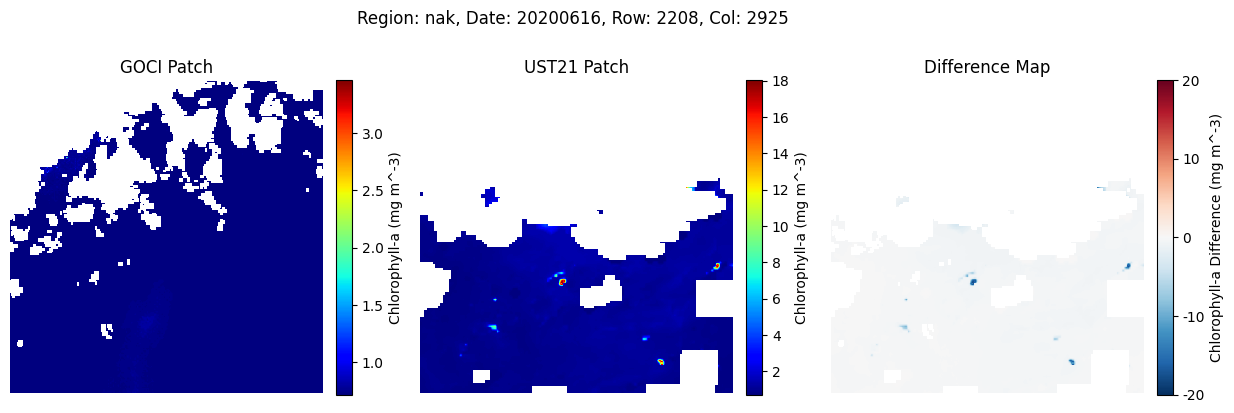

In [54]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy.ma as ma

# Paths to directories
goci_root_directory = '/home/juneyonglee/MyData/backup_20240914/AY_UST/performance/GOCI/GOCI_chl/550000/color_10'
ust21_directory_path = '/media/juneyonglee/My Book/Preprocessed/UST21/chl-a_512/'
save_directory = '/home/juneyonglee/MyData/backup_20240914/AY_UST/ust21_vs_goci_diffmap5'

# Load GOCI land-sea mask
goci_land_sea_mask = np.load('/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI.npy')
ust21_land_sea_mask = np.load('/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.npy')
def extract_info_from_filename(filename):
    """
    Extract date, region, row, and column from GOCI filename.
    Example filename: recon_20110404_nak_r2208_c2925.png
    """
    match = re.search(r'recon_(\d{8})_(nak|sae)_r(\d+)_c(\d+)\.png', filename)
    if match:
        date = match.group(1)  # Extract date as YYYYMMDD
        region = match.group(2)  # Extract region: 'nak' or 'sae'
        row = int(match.group(3))  # Extract row as an integer
        col = int(match.group(4))  # Extract column as an integer
        return date, region, row, col
    else:
        raise ValueError(f"Filename does not match expected pattern: {filename}")
def preprocess_image(image_path):
    """
    Preprocess an image file, ensuring missing data (-999) is represented as NaN.
    """
    # Load the image as grayscale and handle it as raw chlorophyll-a data
    image = imread(image_path)
    if image.shape[-1] == 4:  # If there's an alpha channel
        image = image[..., :3]  # Remove alpha channel
    grayscale_image = rgb2gray(image)  # Convert to grayscale (normalizes to [0, 1])

    # Scale back to the range [0, 20]
    grayscale_image = grayscale_image * 20

    # Retain existing NaN values for missing data (-999 is assumed to be fill value)
    grayscale_image = np.where(grayscale_image == -999, np.nan, grayscale_image)

    # Handle outliers greater than 20
    grayscale_image[grayscale_image > 20] = np.nan

    return grayscale_image
# Function to find UST21 file matching the date and region in the directory structure
def find_ust21_file(ust21_root, date, region):
    year = date[:4]
    month = date[4:6]
    ust21_dir = os.path.join(ust21_root, year, month)
    if os.path.exists(ust21_dir):
        for file in os.listdir(ust21_dir):
            if date in file and region in file and '_bar' not in file:
                return os.path.join(ust21_dir, file)
    return None

# Function to find GOCI file matching the date and region
def find_goci_file(goci_root, date, region):
    for file in os.listdir(goci_root):
        if region in file and date in file and '_bar' not in file:
            return os.path.join(goci_root, file)
    return None

def calculate_goci_coords_in_ust21(file_row, file_col, center_row, center_col, large_patch_size=512, patch_size=256):
    ust21_start_row = center_row - large_patch_size // 2
    ust21_start_col = center_col - large_patch_size // 2
    local_row_within_ust21 = file_row - ust21_start_row
    local_col_within_ust21 = file_col - ust21_start_col
    return max(0, local_row_within_ust21), max(0, local_col_within_ust21)



def compute_and_visualize_difference_map(ust21_patch, comparison_patch, row, col, region_name, save_path):
    """
    Compute and visualize the difference map between UST21 and GOCI patches, ensuring NaN values in UST21 are respected.
    """
    # Normalize the patches to a common range if needed
    ust21_patch = (ust21_patch - ust21_patch.min()) / (ust21_patch.max() - ust21_patch.min()) * 20
    comparison_patch = (comparison_patch - comparison_patch.min()) / (comparison_patch.max() - comparison_patch.min()) * 20

    # Initialize the difference map
    diff_map = comparison_patch - ust21_patch



    # Apply land-sea mask to set land areas to NaN in the difference map
    mask_patch = goci_land_sea_mask[col:col + 256, row:row + 256]
    diff_map[mask_patch == -1] = np.nan

    # Ensure NaN values in the UST21 patch remain as NaN in the difference map


    # Clip the data to the desired range for display
    diff_map_clipped = np.clip(diff_map, -20, 20)
    diff_map_clipped[np.isnan(ust21_patch)] = np.nan

    # Normalize for `imshow` to avoid clipping warnings
    norm_diff_map = (diff_map_clipped + 20) / 40  # Scale to [0, 1] range
    # Visualize and save the difference map
    plt.figure(figsize=(6, 6))
    plt.imshow(norm_diff_map, cmap='RdBu_r', vmin=0, vmax=1)  # Now in [0, 1] range
    cbar = plt.colorbar(label='Chlorophyll-a Difference (mg m^-3)')

    # Set both ticks and labels explicitly to ensure they match
    ticks = np.linspace(0, 1, 9)  # 9 tick locations within the normalized range
    labels = [-20, -15, -10, -5, 0, 5, 10, 15, 20]  # Corresponding labels
    cbar.set_ticks(ticks)
    cbar.set_ticklabels(labels)

    plt.title(f'Difference Map: {region_name}')
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()

# Function to visualize RMSE scatter plot with all RMSE points and overall average
def visualize_rmse_scatter_by_year(rmse_by_year, region_name, save_path):
    years = []
    rmse_values = []

    for year, rmse_list in rmse_by_year.items():
        years.extend([year] * len(rmse_list))
        rmse_values.extend(rmse_list)

    overall_average_rmse = np.nanmean(rmse_values)
    plt.figure(figsize=(8, 6))
    plt.scatter(years, rmse_values, color='blue', s=100, edgecolor='black')
    plt.xlabel('Year')
    plt.ylabel('RMSE (mg m^-3)')
    plt.title(f'RMSE Over Years: {region_name}')
    plt.grid(True)
    plt.text(0.8, 0.05, f'Overall Average RMSE: {overall_average_rmse:.2f}', fontsize=12, ha='right', va='bottom', transform=plt.gca().transAxes)
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()

# Initialize separate lists to store difference maps for each region
nakdong_difference_maps = []
saemangeum_difference_maps = []

# Updated function to calculate mean bias map for a specific region
def calculate_mean_bias_map(region_difference_maps):
    # Stack all difference maps and calculate the mean ignoring NaNs
    stacked_diff_maps = np.stack(region_difference_maps)
    mean_bias_map = np.nanmean(stacked_diff_maps, axis=0)
    return mean_bias_map

# Updated function to calculate mean bias map, ignoring NaN values in UST21 patches
def calculate_mean_bias_map(region_difference_maps):
    # Stack all difference maps and calculate the mean ignoring NaNs
    stacked_diff_maps = np.stack(region_difference_maps)
    mean_bias_map = np.nanmean(stacked_diff_maps, axis=0)
    return mean_bias_map

# Updated function to visualize mean bias map with NaN values
# Updated function to visualize the mean bias map for a specific region
def visualize_mean_bias_map(mean_bias_map, region_name, save_path):
    # Check if there are any valid values to determine a dynamic range
    valid_values = mean_bias_map[~np.isnan(mean_bias_map)]
    if valid_values.size == 0:
        print(f"Warning: Mean bias map for {region_name} has no valid values.")
        return

    # Determine the min and max for dynamic range adjustment
    min_val, max_val = np.nanmin(valid_values), np.nanmax(valid_values)
    print(f"Dynamic range for mean bias map ({region_name}) visualization: min={min_val}, max={max_val}")

    # Plot the mean bias map with dynamic vmin and vmax
    plt.figure(figsize=(6, 6))
    plt.imshow(mean_bias_map, cmap='RdBu_r', vmin=min_val, vmax=max_val)
    plt.colorbar(label='Mean Bias (mg m^-3)')
    plt.title(f'Mean Bias Map: {region_name}')
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()

# Function to extract exact patch based on coordinates
def extract_exact_patch(image, start_row, start_col, patch_size=256):
    patch = image[start_row:start_row + patch_size, start_col:start_col + patch_size]
    return patch

def save_patch(patch, mask, save_path, title="UST21 Patch"):
    """
    Save a single patch image with NaN values represented as white, using a land-sea mask.
    """
    # Copy the patch to avoid modifying the original
    patch = patch.copy()

    # 마스크가 모두 1 (해양)일 경우 마스크 적용 생략
    if np.array_equal(np.unique(mask), [1]):
        print("Mask contains only ocean (1). Skipping mask application.")
    else:
        # Apply the mask: ocean=1, land=999
        patch[mask == 1] = np.nan  # Set land pixels to NaN

    # Outlier values >= 20 처리
    patch[patch >= 20] = np.nan

    # Mask NaN values for visualization
    masked_patch = ma.masked_invalid(patch)

    # Create a colormap and set special properties
    cmap = plt.cm.jet
    cmap.set_bad(color='white')  # Set NaN to white
    cmap.set_under(color='white')  # Set values below vmin to white
    cmap.set_over(color='white')  # Set values above vmax to white

    # Plot the patch
    plt.figure(figsize=(6, 6))
    im = plt.imshow(masked_patch, cmap=cmap, vmin=0, vmax=20)
    plt.title(title)
    cbar = plt.colorbar(im, label='Chlorophyll-a Concentration (mg m^-3)')

    # Save the figure
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()

def save_3column_patch(ust21_patch, goci_patch, difference_map, ust21_mask, goci_mask, region_name, date, row, col, save_path, title="Comparison: UST21 vs GOCI"):
    """
    Save a side-by-side comparison of UST21 patch, Difference Map, and GOCI patch with land-sea masks applied.
    """
    # Copy patches to avoid modifying the originals
    ust21_patch = ust21_patch.copy()
    goci_patch = goci_patch.copy()

    # Apply UST21 mask: ocean=1, land=999
    if not np.array_equal(np.unique(ust21_mask), [1]):  # Apply mask only if it contains land values
        ust21_patch[ust21_mask == 999] = np.nan

    # Apply GOCI mask: ocean=1, land=-1
    if not np.array_equal(np.unique(goci_mask), [1]):  # Apply mask only if it contains land values
        goci_patch[goci_mask == -1] = np.nan

    # Outlier values >= 20 처리
    ust21_patch[ust21_patch >= 20] = np.nan
    goci_patch[goci_patch >= 20] = np.nan

    # Mask NaN values for visualization
    masked_ust21_patch = ma.masked_invalid(ust21_patch)
    masked_goci_patch = ma.masked_invalid(goci_patch)

    # Create a colormap for UST21 and GOCI and set NaN to white
    cmap = plt.cm.jet
    cmap.set_bad(color='white')  # Set NaN to white
    cmap.set_under(color='white')  # Set values below vmin to white
    cmap.set_over(color='white')  # Set values above vmax to white

    # Clip and normalize the difference map
    diff_map_clipped = np.clip(difference_map, -20, 20)
    norm_diff_map = (diff_map_clipped + 20) / 40  # Normalize to [0, 1]
    norm_diff_map[np.isnan(ust21_patch)] = np.nan

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot GOCI patch
    im_goci = axes[0].imshow(masked_goci_patch, cmap='jet')
    axes[0].set_title('GOCI Patch')
    cbar_goci = fig.colorbar(im_goci, ax=axes[0], orientation='vertical', fraction=0.046, pad=0.04)
    cbar_goci.set_label("Chlorophyll-a (mg m^-3)")
    axes[0].axis('off')

    # Plot UST21 patch with NaN as white
    im_ust21 = axes[1].imshow(masked_ust21_patch, cmap='jet')
    axes[1].set_title('UST21 Patch')
    cbar_ust21 = fig.colorbar(im_ust21, ax=axes[1], orientation='vertical', fraction=0.046, pad=0.04)
    cbar_ust21.set_label("Chlorophyll-a (mg m^-3)")
    axes[1].axis('off')

    # Plot Difference Map
    im_diff = axes[2].imshow(norm_diff_map, cmap='RdBu_r', vmin=0, vmax=1)
    axes[2].set_title('Difference Map')
    cbar_diff = fig.colorbar(im_diff, ax=axes[2], orientation='vertical', fraction=0.046, pad=0.04)
    cbar_diff.set_label("Chlorophyll-a Difference (mg m^-3)")
    cbar_diff.set_ticks([0, 0.25, 0.5, 0.75, 1])
    cbar_diff.set_ticklabels([-20, -10, 0, 10, 20])
    axes[2].axis('off')

    # Set the main title
    fig.suptitle(title, fontsize=16)

    # Add subtitle if region_name, date, row, and col are provided
    if region_name and date and row is not None and col is not None:
        plt.suptitle(f"Region: {region_name}, Date: {date}, Row: {row}, Col: {col}", fontsize=12, y=0.95)

    # Save the combined plot
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()

def process_files(directory, goci_root, save_dir):
    os.makedirs(save_dir, exist_ok=True)

    rmse_by_year_nakdong = {}
    rmse_by_year_saemangeum = {}

    for file in os.listdir(goci_root):
        if file.endswith('.png') and '_bar' not in file:
            goci_date, region, actual_row, actual_col = extract_info_from_filename(file)  # Unpacking four values
            year = int(goci_date[:4])

            if region == 'nak':
                # Process Nakdong region
                goci_nakdong = find_goci_file(goci_root, goci_date, 'nak')
                ust21_nakdong = find_ust21_file(directory, goci_date, 'nak')
                if goci_nakdong and ust21_nakdong:
                    goci_patch = preprocess_image(goci_nakdong)
                    ust21_patch = preprocess_image(ust21_nakdong)

                    # Extract the 256x256 patch
                    start_row, start_col = calculate_goci_coords_in_ust21(actual_row, actual_col, 2336, 3053)
                    ust21_patch_256 = extract_exact_patch(ust21_patch, start_row, start_col)
                    ust21_mask_patch = ust21_land_sea_mask[start_row:start_row + 256, start_col:start_col + 256]
                    goci_mask_patch = goci_land_sea_mask[actual_col:actual_col + 256, actual_row:actual_row + 256]

                    # Compute the difference map
                    diff_map = compute_difference_map(ust21_patch_256, goci_patch, actual_row, actual_col)

                    # Save the difference map
                    diff_map_path = os.path.join(save_dir, f'difference_map_nakdong_{goci_date}_r{actual_row}_c{actual_col}.png')
                    visualize_difference_map(diff_map, "Nakdong", diff_map_path)

                    # Save the UST21 patch
                    ust21_patch_path = os.path.join(save_dir, f'ust21_patch_nakdong_{goci_date}_r{actual_row}_c{actual_col}.png')
                    save_patch(ust21_patch_256, ust21_mask_patch, ust21_patch_path, title="UST21 Patch - Nakdong")

                    # Save 3-column patch for Nakdong
                    three_column_save_path = os.path.join(save_dir, f'3column_patch_nakdong_{goci_date}_r{actual_row}_c{actual_col}.png')
                    save_3column_patch(
                        ust21_patch_256, goci_patch, diff_map,
                        ust21_mask=ust21_mask_patch, goci_mask=goci_mask_patch,
                        region_name=region, date=goci_date, row=actual_row, col=actual_col,
                        save_path=three_column_save_path, title='Comparison for Nakdong'
                    )

                    # RMSE calculation
                    valid_diff_map = diff_map[(~np.isnan(diff_map)) & (diff_map != -20)]
                    if valid_diff_map.size > 0:
                        patch_rmse = np.sqrt(np.nanmean(np.square(valid_diff_map)))
                        rmse_by_year_nakdong.setdefault(year, []).append(patch_rmse)
                        nakdong_difference_maps.append(diff_map)
                    else:
                        print(f"Skipping RMSE calculation for {file} in Nakdong region due to no valid values.")

            elif region == 'sae':
                # Process Saemangeum region
                goci_saemangeum = find_goci_file(goci_root, goci_date, 'sae')
                ust21_saemangeum = find_ust21_file(directory, goci_date, 'sae')
                if goci_saemangeum and ust21_saemangeum:
                    goci_patch = preprocess_image(goci_saemangeum)
                    ust21_patch = preprocess_image(ust21_saemangeum)

                    # Extract the 256x256 patch
                    start_row, start_col = calculate_goci_coords_in_ust21(actual_row, actual_col, 1851, 2639)
                    ust21_patch_256 = extract_exact_patch(ust21_patch, start_row, start_col)
                    ust21_mask_patch = ust21_land_sea_mask[start_row:start_row + 256, start_col:start_col + 256]
                    goci_mask_patch = goci_land_sea_mask[actual_col:actual_col + 256, actual_row:actual_row + 256]

                    # Compute the difference map
                    diff_map = compute_difference_map(ust21_patch_256, goci_patch, actual_row, actual_col)

                    # Save the difference map
                    diff_map_path = os.path.join(save_dir, f'difference_map_saemangeum_{goci_date}_r{actual_row}_c{actual_col}.png')
                    visualize_difference_map(diff_map, "Saemangeum", diff_map_path)

                    # Save the UST21 patch
                    ust21_patch_path = os.path.join(save_dir, f'ust21_patch_saemangeum_{goci_date}_r{actual_row}_c{actual_col}.png')
                    save_patch(ust21_patch_256, ust21_mask_patch, ust21_patch_path, title="UST21 Patch - Saemangeum")

                    # Save 3-column patch for Saemangeum
                    three_column_save_path = os.path.join(save_dir, f'3column_patch_saemangeum_{goci_date}_r{actual_row}_c{actual_col}.png')
                    save_3column_patch(
                        ust21_patch_256, goci_patch, diff_map,
                        ust21_mask=ust21_mask_patch, goci_mask=goci_mask_patch,
                        region_name=region, date=goci_date, row=actual_row, col=actual_col,
                        save_path=three_column_save_path, title='Comparison for Saemangeum'
                    )

                    # RMSE calculation
                    valid_diff_map = diff_map[(~np.isnan(diff_map)) & (diff_map != -20)]
                    if valid_diff_map.size > 0:
                        patch_rmse = np.sqrt(np.nanmean(np.square(valid_diff_map)))
                        rmse_by_year_saemangeum.setdefault(year, []).append(patch_rmse)
                        saemangeum_difference_maps.append(diff_map)
                    else:
                        print(f"Skipping RMSE calculation for {file} in Saemangeum region due to no valid values.")

    # Visualize RMSE scatter plot for Nakdong
    if rmse_by_year_nakdong:
        visualize_rmse_scatter_by_year(rmse_by_year_nakdong, 'Nakdong', os.path.join(save_dir, 'rmse_scatter_nakdong.png'))

    # Visualize RMSE scatter plot for Saemangeum
    if rmse_by_year_saemangeum:
        visualize_rmse_scatter_by_year(rmse_by_year_saemangeum, 'Saemangeum', os.path.join(save_dir, 'rmse_scatter_saemangeum.png'))

    # Calculate and save the mean bias map for Nakdong
    if nakdong_difference_maps:
        mean_bias_map_nakdong = calculate_mean_bias_map(nakdong_difference_maps)
        mean_bias_map_nakdong_path = os.path.join(save_dir, 'mean_bias_map_nakdong.png')
        visualize_mean_bias_map(mean_bias_map_nakdong, "Nakdong", mean_bias_map_nakdong_path)

    # Calculate and save the mean bias map for Saemangeum
    if saemangeum_difference_maps:
        mean_bias_map_saemangeum = calculate_mean_bias_map(saemangeum_difference_maps)
        mean_bias_map_saemangeum_path = os.path.join(save_dir, 'mean_bias_map_saemangeum.png')
        visualize_mean_bias_map(mean_bias_map_saemangeum, "Saemangeum", mean_bias_map_saemangeum_path)


# Call the process function
process_files(ust21_directory_path, goci_root_directory, save_directory)
